In [73]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

1) Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем).

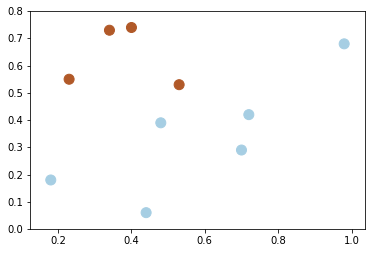

In [74]:
data = pd.read_csv('csv_dataframes/svm-data.csv', header = None)
X = np.array(data.loc[:,1:])
y = np.array(data[0])
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.Paired)
plt.show() #показывает фигуру, чтобы не писалось <matplotlib.collections.PathCollection at 0x1a161da1d0>

2) Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.

In [87]:
model = SVC(kernel = 'linear', C = 100000, random_state = 241)
#еще веды ядер ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model.fit(X,y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

3) Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [88]:
sup_vec_list = [x+1 for x in model.support_] #нумерация начинается с еденицы
print(*sup_vec_list, sep=' ')

4 5 10


4*)Построим график разделяющей поверхности и разделяющей полосы ширины 2, касающейся опорных векторов

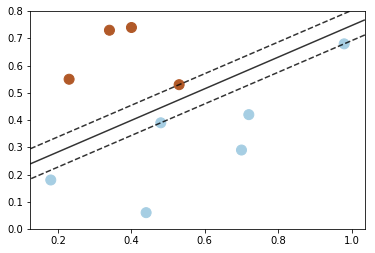

In [91]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.Paired)
#s - radius of objects; c - color, sequence, or sequence of color ; cmap - colormap

# plot the decision function
ax = plt.gca() #show coordinates of last plt.scatter
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
"""
#return coordinate matrices from coordinate vectors.
#Make 2-D coordinate arrays for vectorized evaluations of 2-D scalar/vector fields over 2-D grids,
given one-dimensional coordinate arrays x,y.
"""
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#vstack - stack arrays in sequence vertically
#ravel - Return a contiguous flattened 1-D array.
Z = model.decision_function(xy).reshape(XX.shape)
#decision_function - Distance of the samples X to the separating hyperplane.

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='black',levels=[-1,0,1], alpha=0.8,linestyles=['--','-','--'])
#см https://matplotlib.org/examples/pylab_examples/contour_demo.html
#alpha - alpha blending value; levels - determines the number and positions of the contour lines / regions.
#linestyles - стили линий уровней levels

plt.show()